In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('PreprocessedTitanicDataset.csv')

In [48]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,0,3,-0.565736,1,0,-0.502445,True,False,False
1,1,3,-0.258337,0,0,-0.488854,False,False,False
2,1,1,0.433312,1,0,0.420730,False,False,False
3,0,3,0.433312,0,0,-0.486337,True,False,False
4,0,3,-0.104637,0,0,-0.478116,True,False,True
...,...,...,...,...,...,...,...,...,...
713,0,2,-0.181487,0,0,-0.386671,True,False,False
714,1,1,-0.796286,0,0,-0.044381,False,False,False
715,0,3,-0.104637,1,2,-0.176263,False,False,False
716,1,1,-0.258337,0,0,-0.044381,True,True,False


In [49]:
df.describe() ## Summary statistics(mean, median, std stc)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.334262,2.512535,-0.098537,0.413649,0.317549,-0.302242
std,0.472061,0.715818,0.769449,0.855001,0.784792,0.266674
min,0.000000,1.000000,-2.025883,0.000000,0.000000,-0.648422
25%,0.000000,2.000000,-0.565736,0.000000,0.000000,-0.489568
50%,0.000000,3.000000,-0.104637,0.000000,0.000000,-0.411839
75%,1.000000,3.000000,0.270006,1.000000,0.000000,-0.126366
max,1.000000,3.000000,1.893459,5.000000,6.000000,0.587429


In [50]:
df.median()

Survived      0.000000
Pclass        3.000000
Age          -0.104637
SibSp         0.000000
Parch         0.000000
Fare         -0.411839
Sex_male      1.000000
Embarked_C    0.000000
Embarked_Q    0.000000
dtype: float64

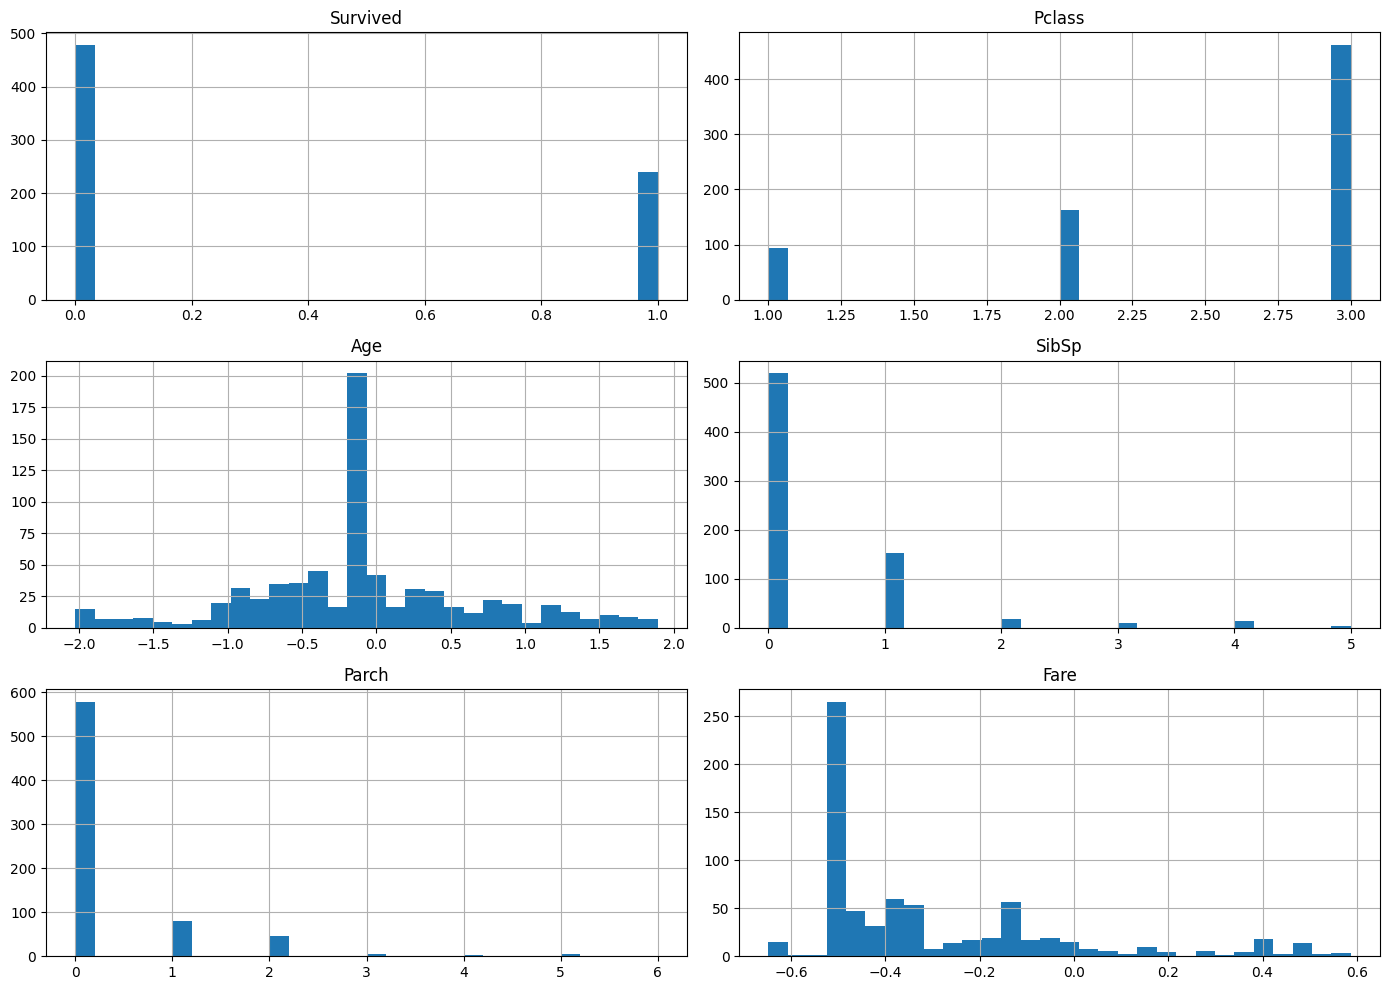

In [51]:
df.hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()


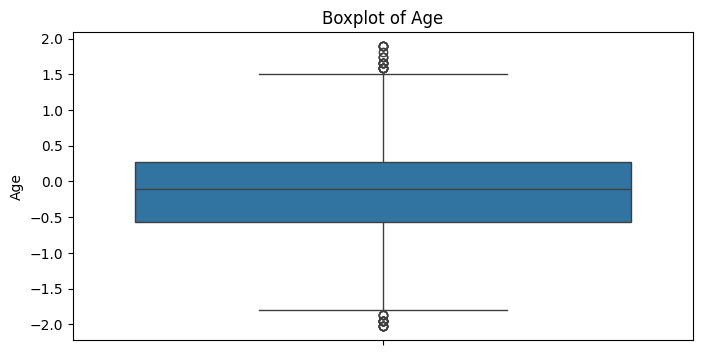

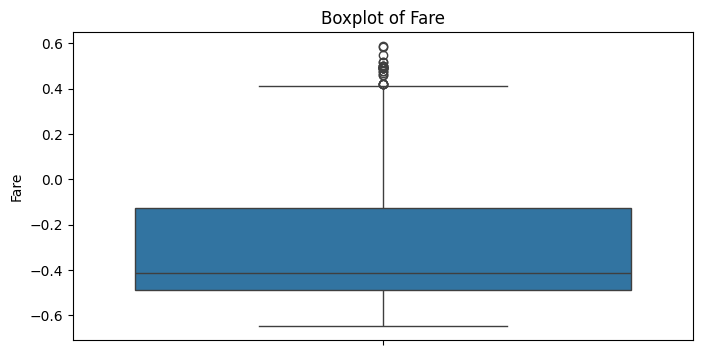

In [52]:
# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [53]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]

print("Number of outliers in Age:", outliers.shape[0])


Number of outliers in Age: 42


In [54]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))]

print("Number of outliers in Fare:", outliers.shape[0])

Number of outliers in Fare: 26


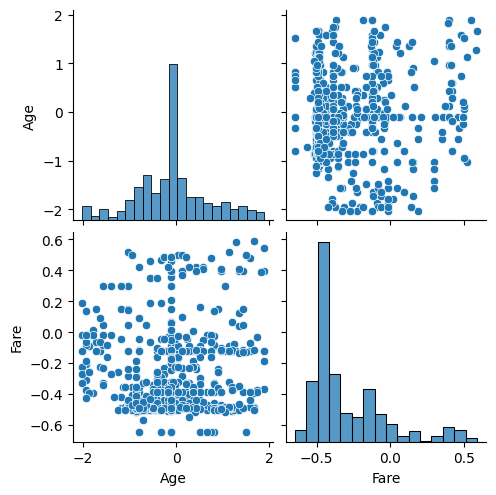

In [55]:
# Pairplot for feature relationship
sns.pairplot(df[['Age','Fare']])
plt.show()


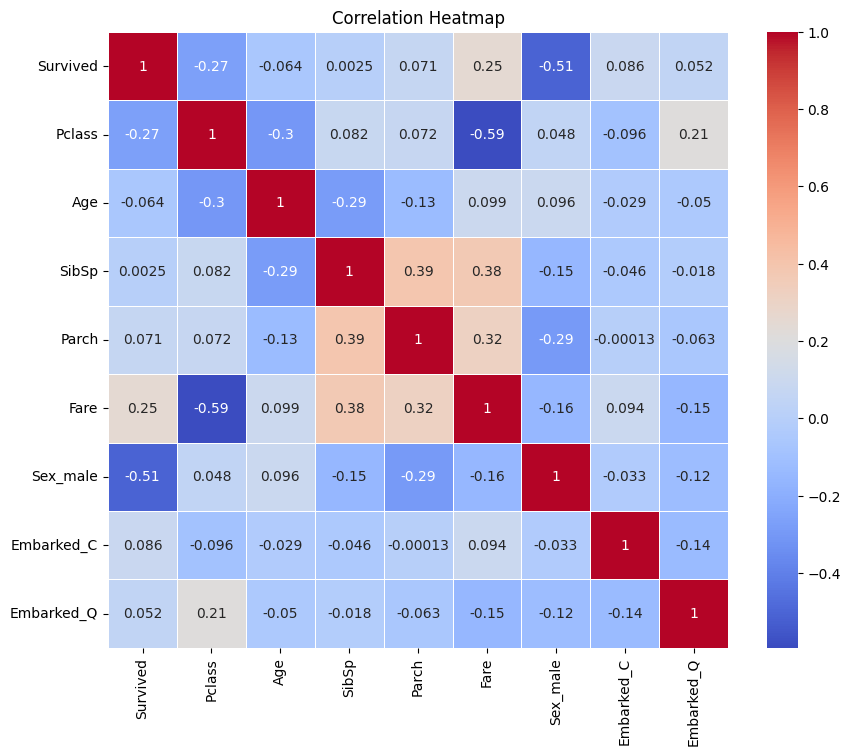

In [56]:
# Correlation matrix with heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Clearly the heatmap says,
 # The strongest positive correlation is in between 'SibSp' and 'Parch'
 # The strongest negative correlation is in between 'Pclass' and 'Fare'


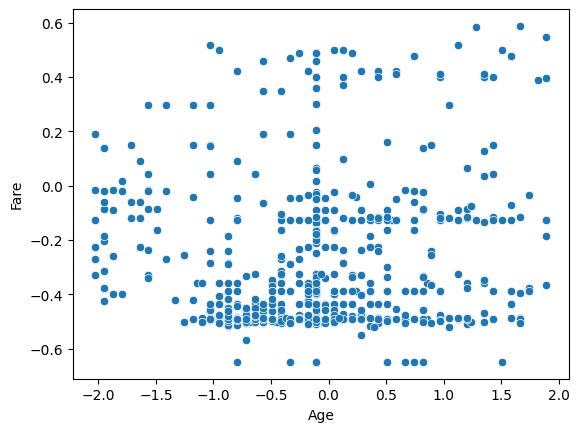

In [57]:
# Scatter plot for 'Age' and 'Fare'
sns.scatterplot(x='Age', y='Fare', data=df)
plt.show()


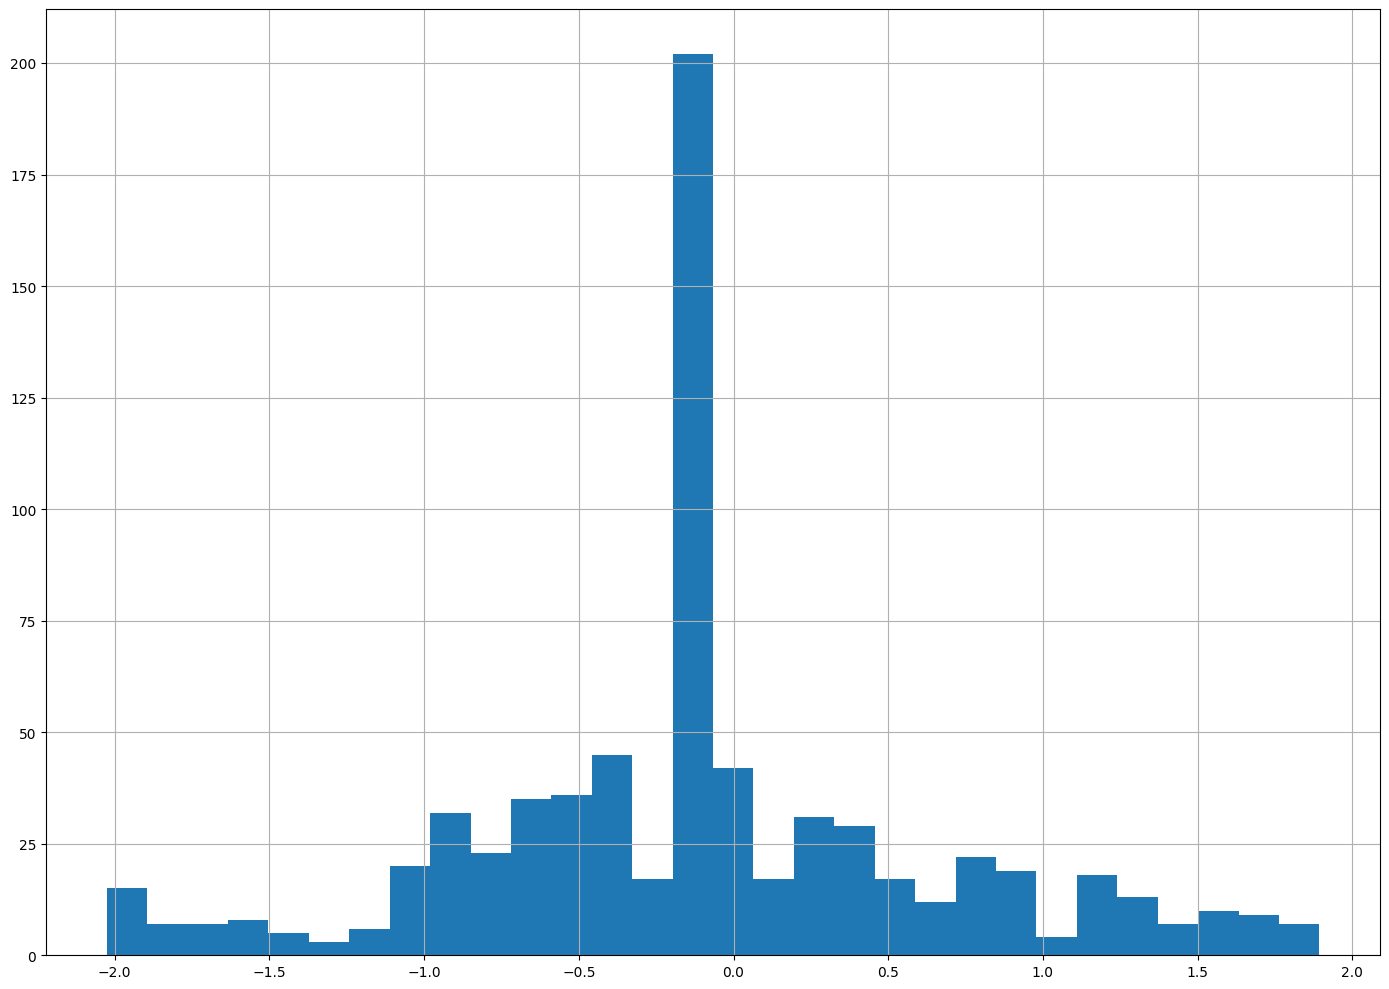

In [58]:
# Histogram of 'Age'
df['Age'].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

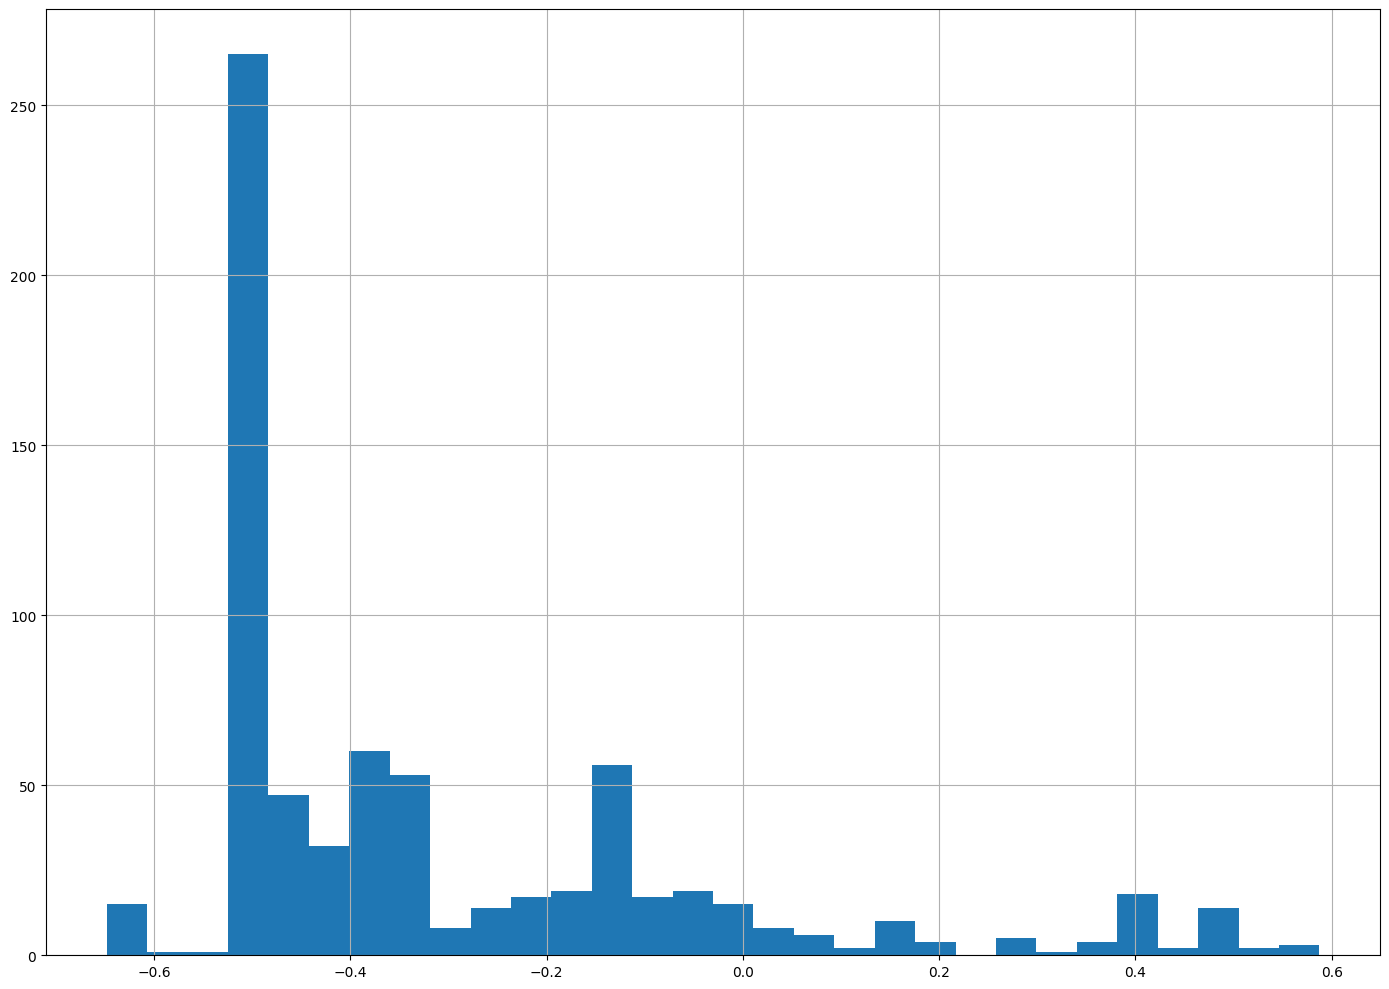

In [59]:
# Histogram of 'Fare'
df['Fare'].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

In [60]:
print("Skewness of Age : ", df['Age'].skew())
print("Skewness of Fare : ", df['Fare'].skew())

Skewness of Age :  0.12412639194245896
Skewness of Fare :  1.4943897925463028


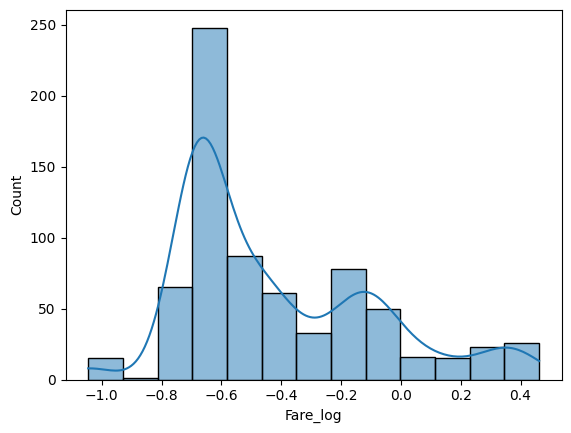

In [61]:
## 'Fare' is highly skewed with skewness = 1.494, we need log scaling
df['Fare_log'] = np.log1p(df['Fare'])  # log1p handles 0 values safely
sns.histplot(df['Fare_log'], kde=True)
plt.show()